### 1) Reading and Understanding the data:

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Confirming the working directory:

from os import chdir, getcwd
wd=getcwd()
wd
chdir(wd)
wd

'C:\\Users\\namro\\Desktop\\IITB_Materials_DS\\ML\\MultipleLinearRegression CaseStudy'

In [4]:
carprice = pd.read_csv('CarPrice_Assignment.csv',encoding=' ISO-8859-1')
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### Inspect the various aspects of the "carprice" dataframe:

In [5]:
# Validating the total number of rows and columns
carprice.shape

(205, 26)

In [6]:
#Valiadting the datatypes for each features:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

From the above info we can figure out that there are no null values for any of the columns.As a result we do not have to perform any imputation or deletion of rows or columns.

In [7]:
# Statistical overview of the dataset
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
carprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### 2) Data Preparation

a) There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [9]:
carprice['CarName']=carprice['CarName'].apply(lambda name: name.split()[0])
#Naming the new column as Company
carprice.rename(index=str,columns={'CarName':'Company'},inplace=True)

In [10]:
carprice.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


b) `citympg` and `highwaympg` are columns for mileage in city and mileage on highway respectively. Thus, we add another new column named as totalmpg which implies the total mileage in city and on highway and removing the two columns.
<p> The Combined MPG value is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%.</p>

In [11]:
carprice['total_mpg']=(55*carprice['citympg']/100)+(45*carprice['highwaympg']/100)


In [12]:
carprice.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,total_mpg
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [13]:
#Validating if the column total_mpg is present.
carprice.columns

Index(['car_ID', 'symboling', 'Company', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'total_mpg'],
      dtype='object')

c) `car_ID` column represents the unique id for each datapoint.This column won't contribute to our analysis. So we can
drop this column.

In [14]:
carprice.drop(['car_ID','citympg','highwaympg'],axis=1,inplace=True)


In [15]:
# validating the columns
carprice.columns

Index(['symboling', 'Company', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'total_mpg'],
      dtype='object')

d) Validating all the company names present in our dataset.

In [16]:
# To print the unique values for the column:
carprice.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
carprice.Company.nunique()

28

As can be seen for column `Company` few company names are spelled wrong, as for example: maxda and mazda are both same but spelled different. Also,'porsche','porcshce' and 'toyota', 'toyouta'are misspelled. 'Nissan' and 'nissan' are both same companies but one starts with Uppercase and the other with lowercase. 'vokswagen', 'volkswagen', 'vw' all refer to the same company. So we rectify the company names to avoid any misleading data.


In [18]:
carprice.Company.replace('maxda','mazda',inplace=True)
carprice.Company.replace('Nissan','nissan',inplace=True)
carprice.Company.replace('porcshce','porsche',inplace=True)
carprice.Company.replace('toyouta','toyota',inplace=True)
carprice.Company.replace('vokswagen','volkswagen',inplace=True)
carprice.Company.replace('vw','volkswagen',inplace=True)

In [19]:
# Verifying again the company names:
carprice.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
carprice.Company.nunique()

22

In [21]:
# Converting the datatype of the symboling column to string as it is a categorical column:
#carprice.symboling=carprice.symboling.astype(str)

In [22]:
# Validating the dataset after preparing the data for further analysis:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 24 columns):
symboling           205 non-null int64
Company             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
price             

### 3) Visualizing the dataset

Visualizing all the numeric variables:

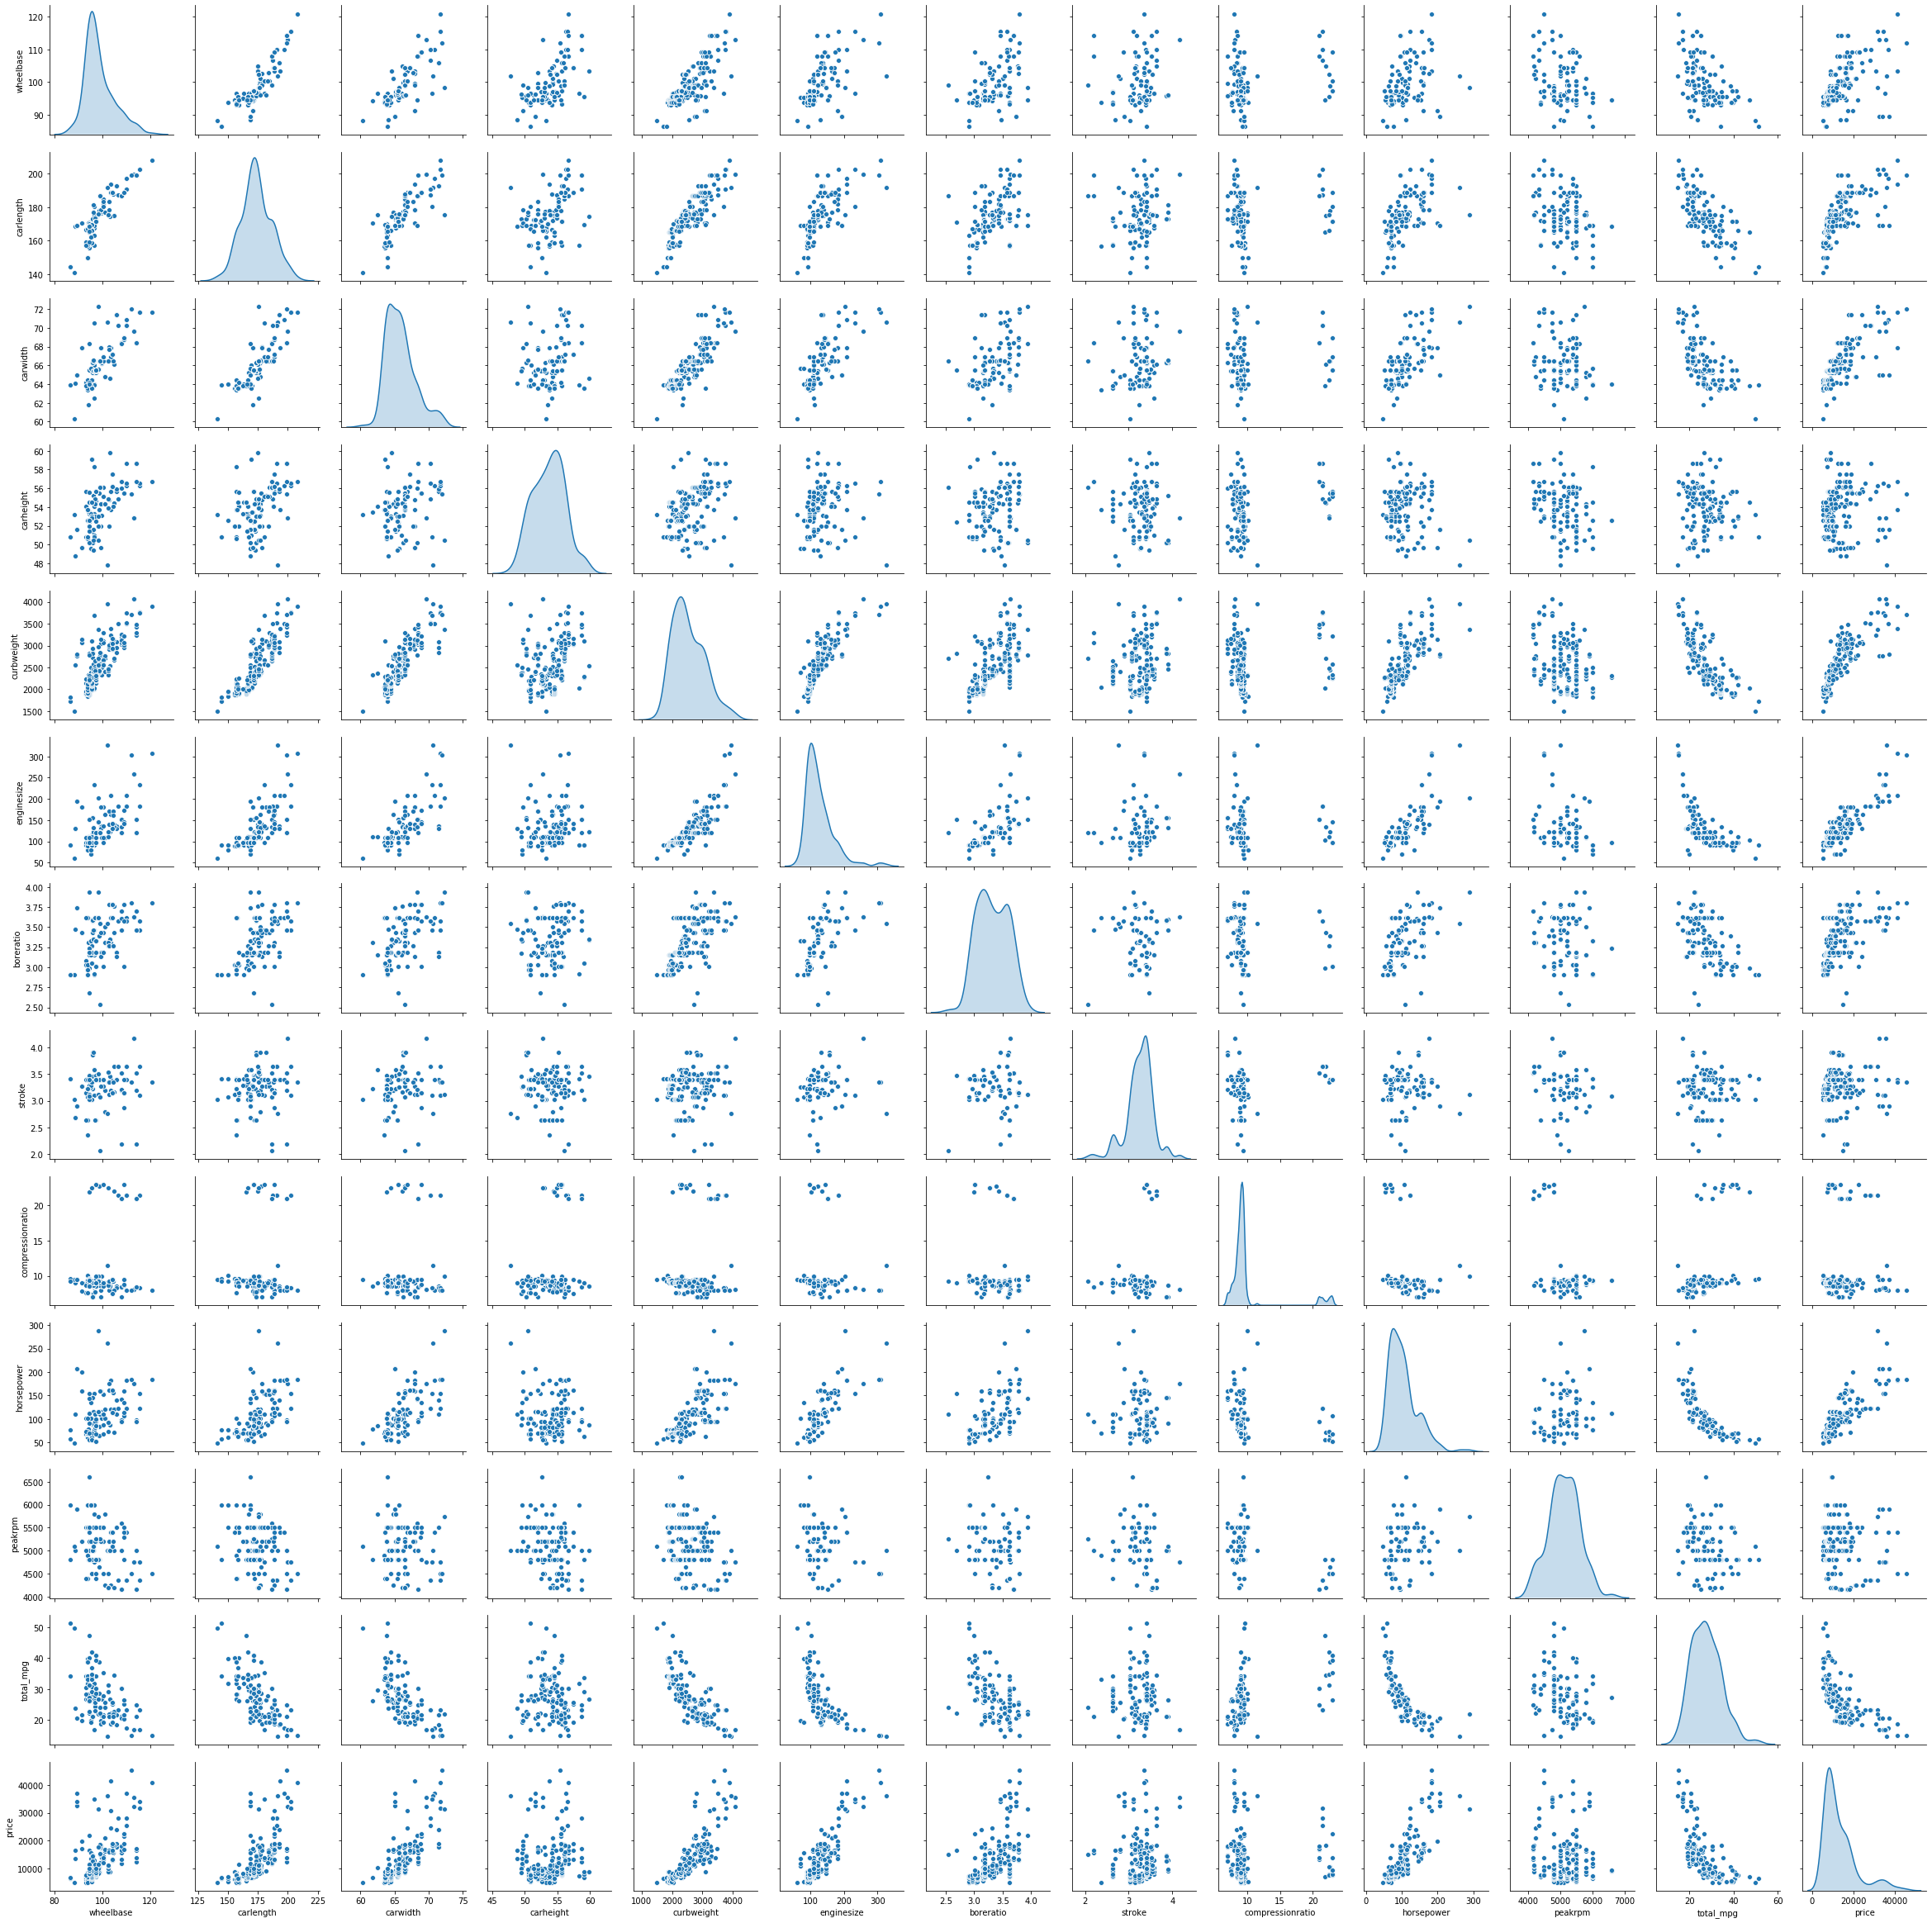

In [23]:
# As given in the data dictionary the given vars are all numeric variables. Plotting the numerical variables.

sns.pairplot(carprice, vars=['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio',
                            'stroke','compressionratio', 'horsepower', 'peakrpm', 'total_mpg','price'], diag_kind="kde")


In [24]:
# To check the skewness of the variables:
round(carprice.skew(),2)

symboling           0.21
wheelbase           1.05
carlength           0.16
carwidth            0.90
carheight           0.06
curbweight          0.68
enginesize          1.95
boreratio           0.02
stroke             -0.69
compressionratio    2.61
horsepower          1.41
peakrpm             0.08
price               1.78
total_mpg           0.62
dtype: float64

We can see from the above plot and the code that the variables `enginesize`,`compressionratio`, and `price` are skewed towards the right.

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.

Validating the mean, median, and variance of the variables:

In [25]:
print('Mean:',carprice.price.mean())
print('Median:',carprice.price.median())
print('Standard Deviation:',carprice.price.std())
print('Variance:',carprice.price.var())

Mean: 13276.710570731706
Median: 10295.0
Standard Deviation: 7988.85233174315
Variance: 63821761.57839796


As we can see that for the variable `price` the data is more skewed towards the right where the mean > median. Also here
the variance is quite high. Best measure of central tendency would be the Median here.

In [26]:
print('Mean:',carprice.compressionratio.mean())
print('Median:',carprice.compressionratio.median())
print('Standard Deviation:',carprice.compressionratio.std())
print('Variance:',carprice.compressionratio.var())

Mean: 10.142536585365855
Median: 9.0
Standard Deviation: 3.972040321863297
Variance: 15.777104318507885


In [27]:
print('Mean:',carprice.enginesize.mean())
print('Median:',carprice.enginesize.median())
print('Standard Deviation:',carprice.enginesize.std())
print('Variance:',carprice.enginesize.var())

Mean: 126.90731707317073
Median: 120.0
Standard Deviation: 41.642693438179826
Variance: 1734.1139167862254


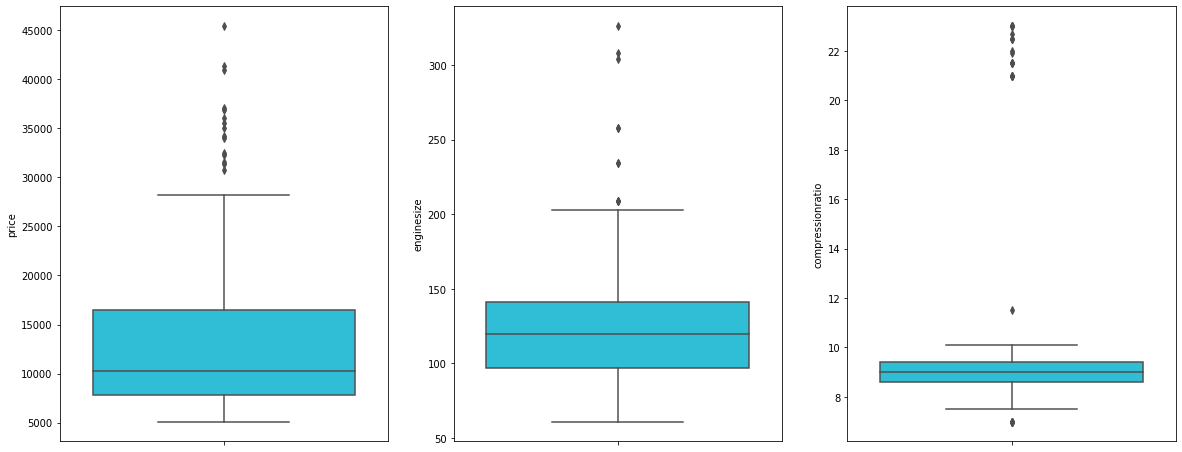

In [28]:
# Plotting the skewed variables in boxplot:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.boxplot(y=carprice.price,color='#13d2f2')

plt.subplot(1,3,2)
sns.boxplot(y=carprice.enginesize,color='#13d2f2')

plt.subplot(1,3,3)
sns.boxplot(y=carprice.compressionratio,color='#13d2f2')


From the above boxplot we can see that the `price` is evidently skewed towards right. This implies that there are more cheaper cars than expensive ones in our dataset where the first quartile (Q1) is 7788, median is 10295, and the third quartile (Q3) is 16503. The IQR would be 8715 which indicates how spread the middle values are. There are outliers as well.

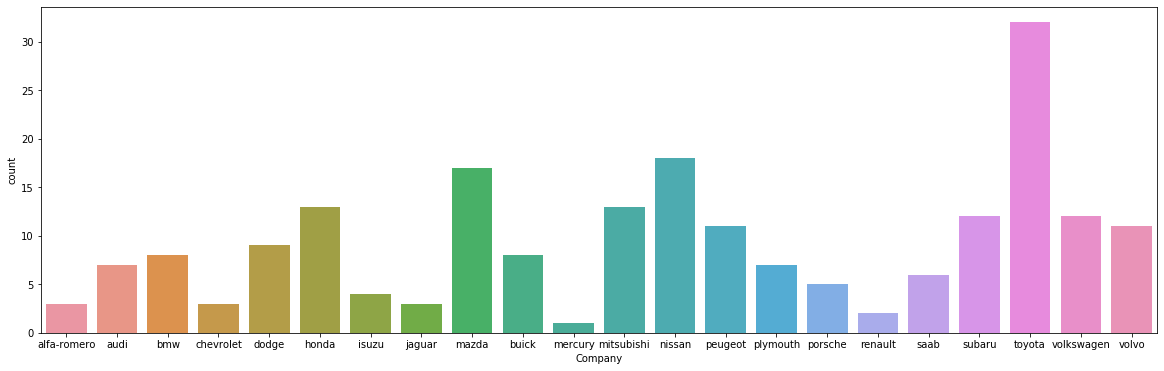

In [29]:
# Analyzing the company that has more number of cars.
plt.figure(figsize=(20,6))
sns.countplot(carprice.Company)

As can be seen the company 'Toyota' has most cars as compared to other brands.

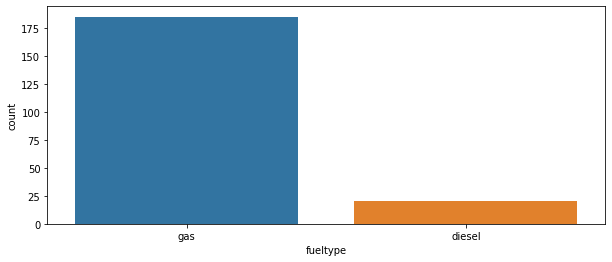

In [30]:
# Analyzing if diesel and petrol cars.
plt.figure(figsize=(10,4))
sns.countplot(carprice.fueltype)

As can be seen the number of cars with fueltype 'gas' is more as compared to cars with fueltype as 'diesel'.

In [31]:
carprice.columns

Index(['symboling', 'Company', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'total_mpg'],
      dtype='object')

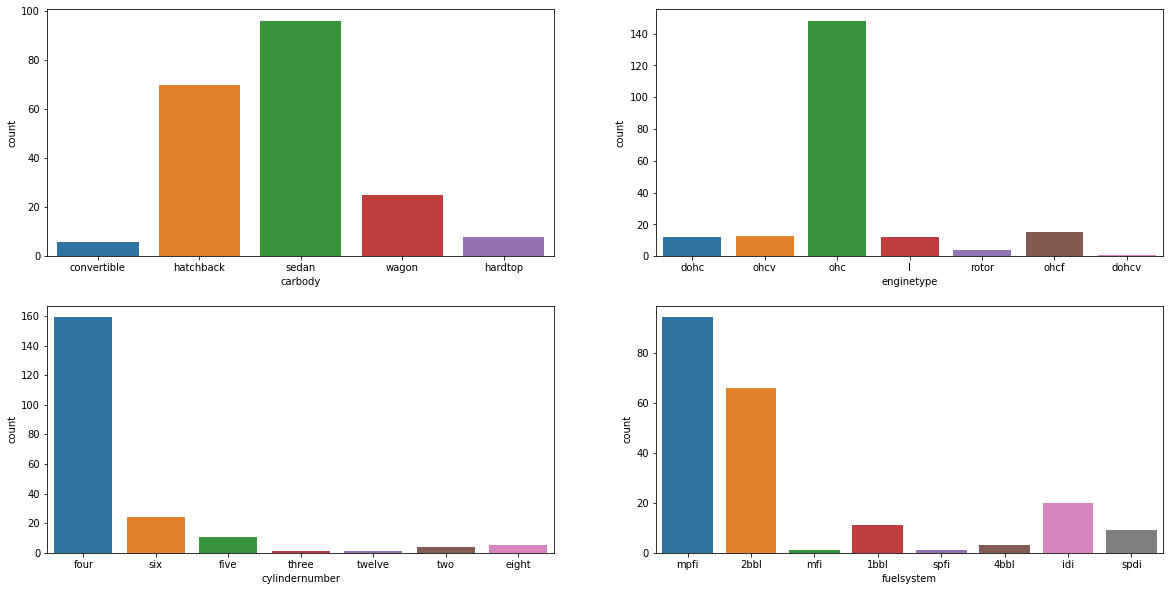

In [32]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.countplot(carprice.carbody)

plt.subplot(2,2,2)
sns.countplot(carprice.enginetype)

plt.subplot(2,2,3)
sns.countplot(carprice.cylindernumber)

plt.subplot(2,2,4)
sns.countplot(carprice.fuelsystem)

As we can see from the above plot 'sedan carbody' is more popular. The engine type mostly manufactured is 'ohc' and the cars with 'four' cylinders with 'mpfi' fuelsystem are higher in count.

##### Analyzing all the above variables against price.

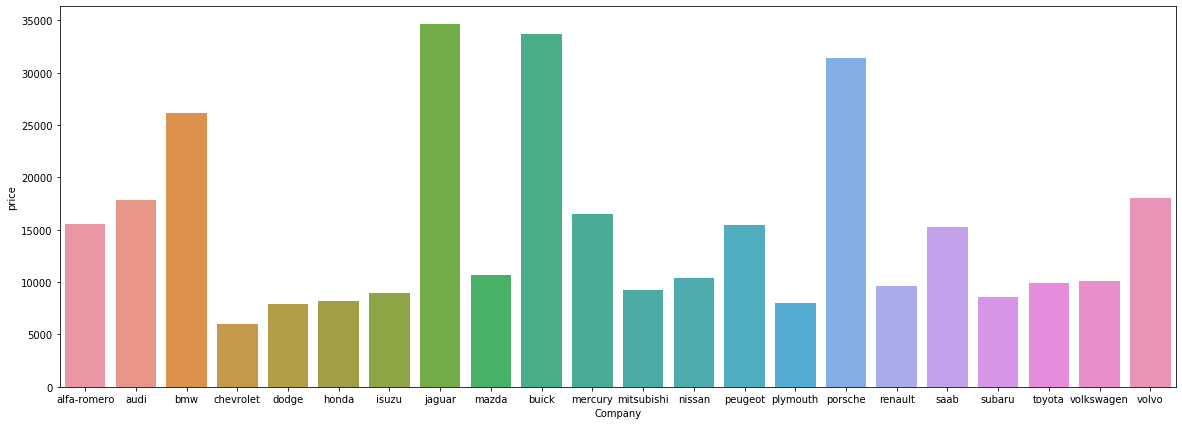

In [33]:
plt.figure(figsize=[20,7])
sns.barplot(x=carprice.Company,y=carprice.price,ci=None)

As can be seen from the above plot, Companies like 'jaguar','buick' manufactures the most expensive cars followed by 'porsche' and 'bmw'.

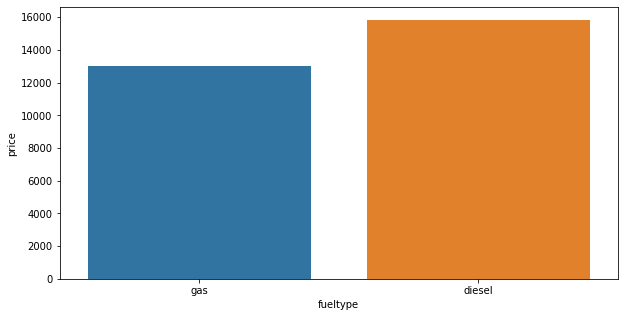

In [34]:
plt.figure(figsize=[10,5])
sns.barplot(x=carprice.fueltype,y=carprice.price,ci=None)

As can be seen from the ablove plot, 'diesel' cars are more pricier than 'gas'.


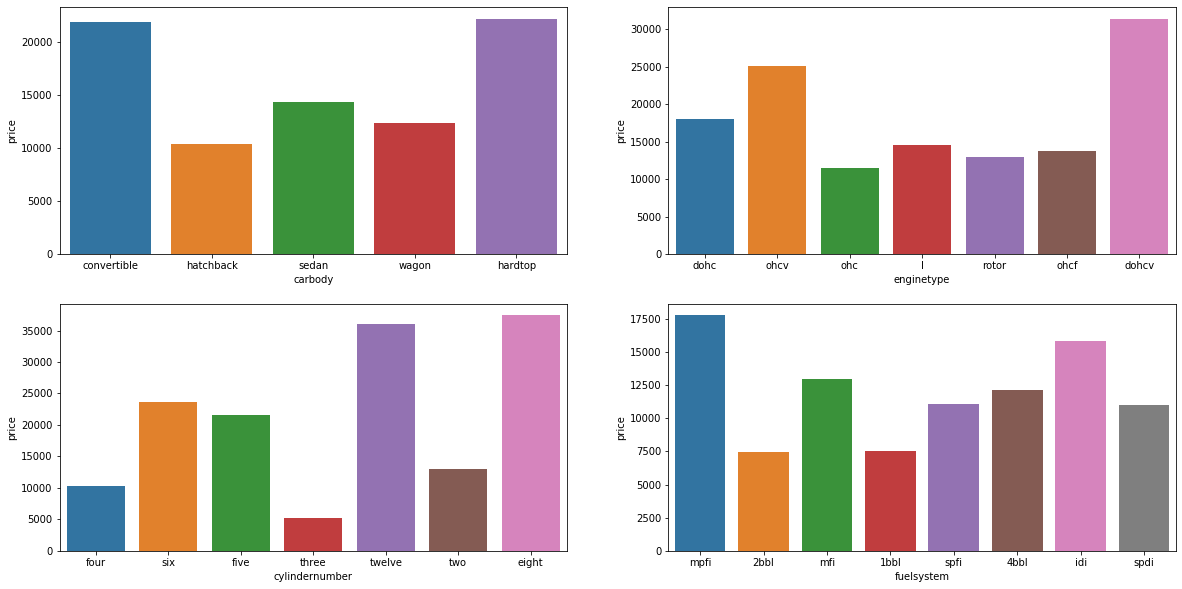

In [35]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(x='carbody',y='price', data=carprice,ci=None)

plt.subplot(2,2,2)
sns.barplot(x='enginetype',y='price', data=carprice,ci=None)

plt.subplot(2,2,3)
sns.barplot(x='cylindernumber',y='price', data=carprice,ci=None)

plt.subplot(2,2,4)
sns.barplot(x='fuelsystem',y='price', data=carprice,ci=None)

-  From the above plot we can say that the carbody 'convertible' and 'hardtop' are expensive. <br>
-  The enginetype 'dohcv' is more pricier followed by 'dohc'. <br>
-  Cars with 8 cylinders are more pricier followed by 12 cylinders. Cars having 3 cylinders are inexpensive ones. <br>
-  Cars with fuelsystem 'mpfi' are more pricier followed by 'idi'.


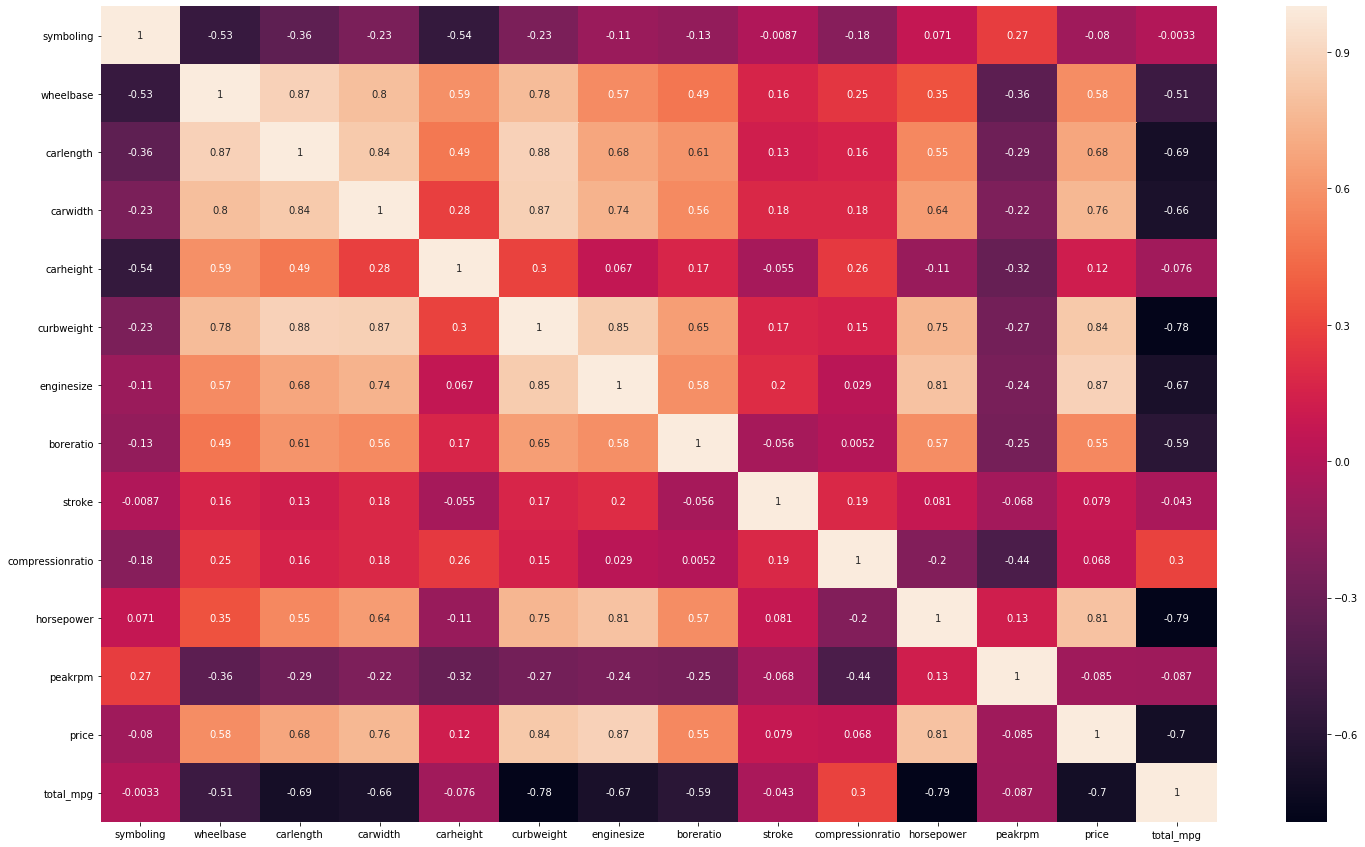

In [36]:
# Now we will plot a heatmap to verify the correlation of the variables.

plt.figure(figsize=[25,15])
sns.heatmap(carprice.corr(),annot=True)

###### The numerical variables having highest correlations are:
-  carlength
-  carwidth
-  curbweight
-  enginesize
-  horsepower
-  total_mpg

### 4) Dummy Variables:

In [37]:
carprice.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [38]:
carprice['symboling']=carprice['symboling'].map({ 3:'highly risky',2: "risky", 1:"moderate risk",0: "moderate safe" , 
                                                 -2:"safe" , -1:"highly safe" })

carprice.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
0,highly risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,highly risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,moderate risk,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,risky,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,risky,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [39]:
# Get the dummy variables for the feature 'symboling' and store it in a new variable - 'risk'
# Get the dummy variables for the feature 'Company' and store it in a new variable - 'company_name'
# Get the dummy variables for the feature 'fueltype' and store it in a new variable - 'fuel_type'
# Get the dummy variables for the feature 'aspiration' and store it in a new variable - 'status'
# Get the dummy variables for the feature 'doornumber' and store it in a new variable - 'door_number'
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'car_body'
# Get the dummy variables for the feature 'drivewheel' and store it in a new variable - 'drive_wheel'
# Get the dummy variables for the feature 'enginelocation' and store it in a new variable - 'engine_location'
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'engine_type'
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'cylinder_number'
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'fuel_system'

risk = pd.get_dummies(carprice['symboling'])
company_name = pd.get_dummies(carprice['Company'])
fuel_type = pd.get_dummies(carprice['fueltype'])
status = pd.get_dummies(carprice['aspiration'])
door_number = pd.get_dummies(carprice['doornumber'])
car_body = pd.get_dummies(carprice['carbody'])
drive_wheel = pd.get_dummies(carprice['drivewheel'])
engine_location = pd.get_dummies(carprice['enginelocation'])
engine_type = pd.get_dummies(carprice['enginetype'])
cylinder_number = pd.get_dummies(carprice['cylindernumber'])
fuel_system = pd.get_dummies(carprice['fuelsystem'])


In [40]:
# Dummy variable for symboling.
risk.head()

,highly risky,highly safe,moderate risk,moderate safe,risky,safe
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


Thus, dummy variables has been created for symboling:
-  `00000` represents highly risky automobile which is 3.
-  `00010` represents risky automobile which is 2.
-  `01000` represents moderate risky automobile which is 1.
-  `00100` represents moderately safe automobile which is 0.
-  `00001` represents safe automobile which is -2.
-  `10000` represents highly safe automobile which is -1.


In [41]:
#dropping the redundant dummy variable in risk. Here redundant is highly risky automobile.
risk = pd.get_dummies(carprice['symboling'],drop_first=True)
risk.head()

,highly safe,moderate risk,moderate safe,risky,safe
0,0,0,0,0,0
1,0,0,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [42]:
# df for dummy variable- company.
company_name

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# All the dummy variables for company.
company_name.columns

Index(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [44]:
#dropping the redundant dummy variable in company_name. 
company_name = pd.get_dummies(carprice['Company'],drop_first=True)
company_name.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Columns after dropping the redundant variable.
company_name.columns

Index(['audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [46]:
# df for dummy variable- fueltype.
fuel_type.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


`1` is gas.
If not then it is Diesel.

In [47]:
#dropping the redundant dummy variable in fuel_type. 
fuel_type = pd.get_dummies(carprice['fueltype'],drop_first=True)
fuel_type.head()

,gas
0,1
1,1
2,1
3,1
4,1


In [48]:
# df for fummy variable aspiration of the  car.

status.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


If `1` then it is std, otherwise turbo.

In [49]:
# Removing the redundant variable
status = pd.get_dummies(carprice['aspiration'],drop_first=True)
status.head()

,turbo
0,0
1,0
2,0
3,0
4,0


In [50]:
# df for the dummy variable of the number of doors in a car.
door_number.head()


,four,two
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


`1` represents that the number of doors in the car is Two, otherwise it's Four.

In [51]:
# Removing the redundant variable from door_number.
door_number = pd.get_dummies(carprice['doornumber'],drop_first=True)
door_number.head()

,two
0,1
1,1
2,1
3,0
4,0


In [52]:
#df for the dummy variable of carbody
car_body.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


-  `0000` is convertible.
-  `0100` is hatchback.
-  `0010` is sedan.
-  `0001` is wagon.
-  `1000` is hardtop.


In [53]:
# Removing the redundant variable from car_body.
car_body = pd.get_dummies(carprice['carbody'],drop_first=True)
car_body.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [54]:
# df for the dummy variable of drive wheel of a car.
drive_wheel.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


-  `00` is for 4wd.
-  `01` is for rwd.
-  `10` is for fwd.

In [55]:
# Removing the redundant variable ffrom drive_wheel.
drive_wheel = pd.get_dummies(carprice['drivewheel'],drop_first=True)
drive_wheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [56]:
#df for the dummy variable for engine location.
engine_location.head()

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


`0` then it's rear, otherwise it's front.

In [57]:
#Removing the redundant variable for engine location.
engine_location = pd.get_dummies(carprice['enginelocation'],drop_first=True)
engine_location.head()

,rear
0,0
1,0
2,0
3,0
4,0


In [58]:
# df for the dummy variable of the engine type.
engine_type.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


-  `100000` is for dohcv.
-  `010000` is for I.
-  `001000` is for ohc.
-  `000100` is for ohcf.
-  `000010` is for ohcv.
-  `000001` is for rotor.
-  `000000` is for dohc.

In [59]:
#Removing the redundant  variable for the engine type.
engine_type = pd.get_dummies(carprice['enginetype'],drop_first=True)
engine_type.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [60]:
#df for the dummy variable of cylinder number.
cylinder_number.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


-  `100000` is for 5 cylinders.
-  `010000` is for 4 cylinders.
-  `001000` is for 6 cylinders.
-  `000100` is for 3 cylinders.
-  `000010` is for 12 cylinders.
-  `000001` is for 2 cylinders.
-  `000000` is for 8 cylinders.

In [61]:
# Removing the redundant variable for cylinder_variable.
cylinder_number = pd.get_dummies(carprice['cylindernumber'],drop_first=True)
cylinder_number.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [62]:
#df for the dummy variable of fuel_system.
fuel_system.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


-  `0000000` is for 1bbl.
-  `1000000` is for 2bbl.
-  `0100000` is for 4bbl.
-  `0010000` is for idi.
-  `0001000` is for mfi.
-  `0000100` is for mpfi.
-  `0000010` is for spdi.
-  `0000001` is for spfi.


In [63]:
# Removing the redundant variable  for fuel_system.
fuel_system = pd.get_dummies(carprice['fuelsystem'],drop_first=True)
fuel_system.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [64]:
# Add the results to the car_price dataframe.
car_price = pd.concat([carprice, risk, company_name, fuel_type, status, door_number,  car_body,
                      drive_wheel, engine_location, engine_type, cylinder_number, fuel_system], axis = 1)
car_price.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,highly risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
1,highly risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,1,0,0
2,moderate risk,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,1,0,0
3,risky,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,1,0,0
4,risky,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,1,0,0


In [65]:
car_price.drop(['symboling','Company', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
           'drivewheel', 'enginelocation','enginetype' , 'cylindernumber', 'fuelsystem'], axis= 1, inplace=True)

In [66]:
# Thus, we have got our final df on which we are going to build our model.
car_price.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


### 5) Splitting Data Into Training and Test Sets:

In [67]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features: 

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
# We are going to take all the variables except the dummy variables.
car_price.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'total_mpg', 'highly safe', 'moderate risk',
       'moderate safe', 'risky', 'safe', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'gas', 'turbo', 'two', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [70]:
scaler = MinMaxScaler()

In [71]:
# Applying scaler to all the given variables:
var = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
          'peakrpm', 'price', 'total_mpg']

df_train[var] = scaler.fit_transform(df_train[var])

In [72]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,1,0,0


In [73]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


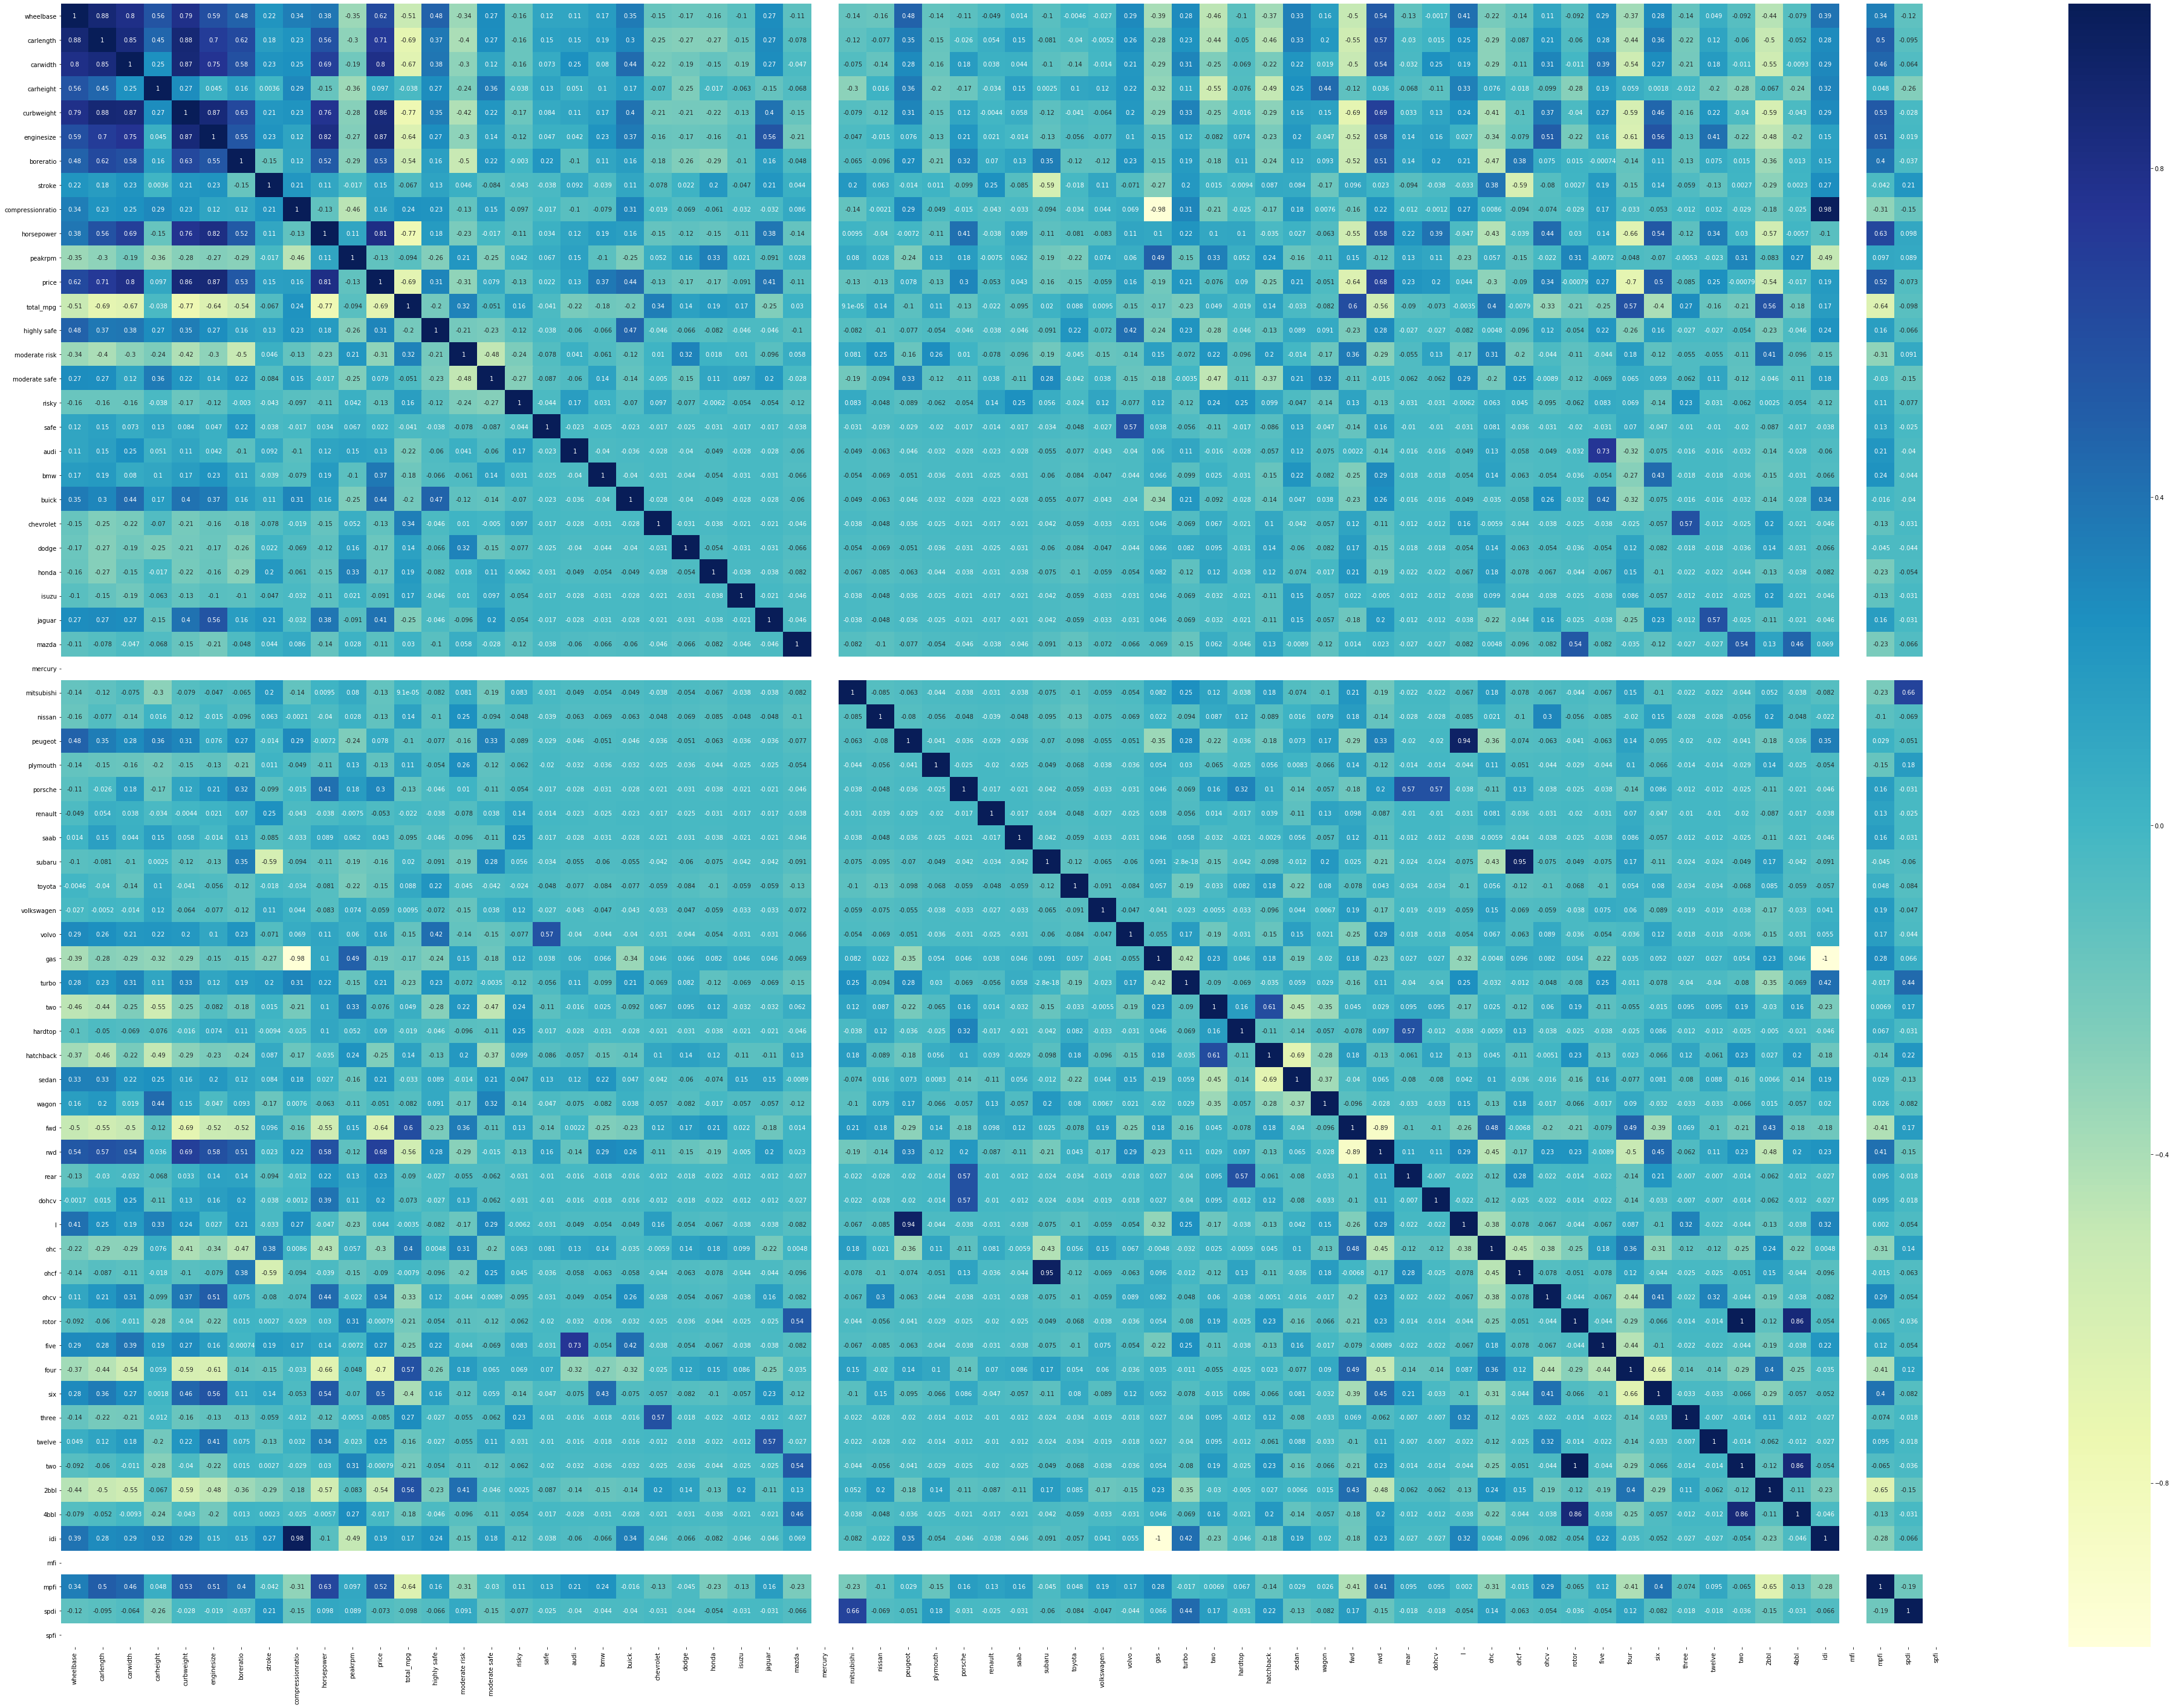

In [74]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (70, 50))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### From the above plot we can see that:
-  `price` is highly negatively correlated to `four` cylinders and a positive correlation with `six` cylinders.
-  `price` is highly positively correlated to horsepower.
-  `price` is positively correlated to `rwd` drivewheel.
-  `price` is also highly positively correlated to `enginesize`, `curbweight`, `carwidth`, `carlength`.

#### We are going to do variable selection using mixed approach.
-  First we would be using RFE for variable selection.
-  After which we would do manual variable selection.

In [75]:
# Dividing into X and Y sets for model building:
y_train = df_train.pop('price')
X_train = df_train

In [76]:
# Using RFE for variable selection:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [77]:
# Running RFE for the output number of the variable equal to 15.
lm= LinearRegression()
lm.fit(X_train, y_train)
rfe= RFE(lm,15) # running RFE
rfe= rfe.fit(X_train, y_train)

In [78]:
# rfe.support_ tells you if a particular feature is selected or not.
# rfe.ranking_ is for all the 15 features that has been selected and is ranked according to its importance.

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 19),
 ('carlength', False, 22),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 24),
 ('horsepower', False, 32),
 ('peakrpm', False, 13),
 ('total_mpg', False, 17),
 ('highly safe', False, 37),
 ('moderate risk', False, 40),
 ('moderate safe', False, 38),
 ('risky', False, 39),
 ('safe', False, 3),
 ('audi', False, 8),
 ('bmw', True, 1),
 ('buick', False, 7),
 ('chevrolet', False, 21),
 ('dodge', False, 16),
 ('honda', False, 15),
 ('isuzu', False, 48),
 ('jaguar', False, 30),
 ('mazda', False, 45),
 ('mercury', False, 49),
 ('mitsubishi', False, 11),
 ('nissan', False, 43),
 ('peugeot', True, 1),
 ('plymouth', False, 14),
 ('porsche', True, 1),
 ('renault', False, 33),
 ('saab', False, 9),
 ('subaru', False, 18),
 ('toyota', False, 46),
 ('volkswagen', False, 44),
 ('volvo', False, 4),
 ('gas', False, 23),
 ('turbo', False, 20),
 ('tw

So after running RFE the 15 features that got selected are:

-  ('carwidth', True, 1),
-  ('curbweight', True, 1),
-  ('enginesize', True, 1),
-  ('boreratio', True, 1),
-  ('stroke', True, 1),
-  ('bmw', True, 1),
-  ('peugeot', True, 1),
-  ('porsche', True, 1),
-  ('rear', True, 1),
-  ('rotor', True, 1),
-  ('five', True, 1),
-  ('four', True, 1),
-  ('three', True, 1),
-  ('twelve', True, 1),
-  ('two', True, 1)


In [79]:
# We will consider only those variables which RFE supports.
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'bmw',
       'peugeot', 'porsche', 'rear', 'rotor', 'five', 'four', 'three',
       'twelve', 'two'],
      dtype='object')

In [80]:
# All the other variables that are not supported by RFE.
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'total_mpg', 'highly safe', 'moderate risk', 'moderate safe',
       'risky', 'safe', 'audi', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo', 'gas', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'six',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [81]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

##### We will now use statsmodel to drop variables one at a time from the 15 selected features. Dropping the features are done using p-values and VIF.

In [82]:
# Build a model with all the selected variables.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        -0.282325
carwidth      0.353228
curbweight    0.391724
enginesize    1.208405
boreratio    -0.353585
stroke       -0.262630
bmw           0.281445
peugeot      -0.110279
porsche       0.170742
rear          0.356542
rotor         0.232379
five          0.155457
four          0.223649
three         0.451339
twelve       -0.441120
two           0.007861
two           0.232379
dtype: float64

In [83]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           9.80e-70
Time:                        14:42:33   Log-Likelihood:                 217.73
No. Observations:                 143   AIC:                            -403.5
Df Residuals:                     127   BIC:                            -356.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2823      0.039     -7.320      0.0

As we can see that there is one insignificant variable, but we will add VIF information as well before dropping any features to check the multicollinearity.

In [84]:
# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,rotor,inf
15,two,inf
2,enginesize,90.80
1,curbweight,57.10
0,carwidth,41.46
3,boreratio,35.79
4,stroke,30.95
11,four,26.71
13,twelve,2.86
10,five,2.77


Generally VIF lesser than 5 should be chosen. Clearly we need to drop some variables. Also two variables has VIF as inf. We definitely would need to verify those features.

#### Dropping the variable and updating the model

In [86]:
# We note that the variable two has high p-value and VIF as inf. So we drop the variable two first.
X = X_train_rfe.drop('two', axis= 1)

In [87]:
# Build another model without the two variable:

X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [88]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           1.03e-70
Time:                        14:42:33   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2770      0.038     -7.337      0.0

Now after removing the variable with high p-value and high VIF we see that no other variables has high p-value. But we need to check VIF as well.


In [89]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,80.71
1,curbweight,54.10
0,carwidth,41.15
3,boreratio,34.56
4,stroke,30.89
11,four,24.19
9,rotor,3.95
13,twelve,2.81
10,five,2.67
7,porsche,1.93


As can be noted here, the variable `enginesize` has high VIF value  but p-value is 0. So this falls under the scenario of low p-value and high VIF value.

In [90]:
# Removing the variable enginesize
X= X.drop('enginesize', axis=1)


In [91]:
# Build another model without the enginesize variable:

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [92]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           5.01e-61
Time:                        14:42:34   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1639      0.042     -3.890      0.0

As can be seen there are now few variables with a significant high value. Amongst which variable `four` has the highest.

In [93]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,40.31
0,carwidth,39.80
2,boreratio,22.51
3,stroke,16.12
10,four,10.07
6,porsche,1.92
9,five,1.70
7,rear,1.62
5,peugeot,1.42
8,rotor,1.37


The VIF for the variable `four` is also quite high. So as it falls under the scenario of high p-value and high VIF we would next remove this variable.

In [94]:
# Removing the variable four
X= X.drop('four', axis=1)

In [95]:
# Build another model without the four variable:

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [96]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           4.72e-62
Time:                        14:42:34   Log-Likelihood:                 189.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     130   BIC:                            -314.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1691      0.029     -5.853      0.0

After removing the variable `four` we note that there are still few highly insignificant variables. Amongst which highest beng the variable `five`. Also we note that there is no such significant changes in the R-squared and Adjusted R-squared. Thus, again calculating the VIF.

In [97]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,39.28
1,curbweight,23.48
2,boreratio,11.34
3,stroke,8.01
6,porsche,1.80
7,rear,1.61
9,five,1.49
5,peugeot,1.28
11,twelve,1.16
4,bmw,1.13


Now, the variable `five` has high p-value but low VIF. So we drop this variable first.

In [98]:
# Removing the variable five
X= X.drop('five', axis=1)

In [99]:
# Build another model without the five variable:

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [100]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           4.37e-63
Time:                        14:42:35   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1678      0.028     -5.892      0.0

After removing the variable `five` we note that there are still few highly insignificant variables. Amongst which highest being the variable `stroke`. Also we note that there is no such changes at all in the R-squared and Adjusted R-squared. Thus, again calculating the VIF.

In [101]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,33.96
1,curbweight,23.47
2,boreratio,9.90
3,stroke,7.65
6,porsche,1.77
7,rear,1.60
5,peugeot,1.24
10,twelve,1.13
4,bmw,1.12
8,rotor,1.04


The variable `stroke` has high p-value and high VIF.

In [102]:
# Removing the variable stroke:
X= X.drop('stroke', axis=1)

In [103]:
# Build another model without the five variable:

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [104]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           4.72e-64
Time:                        14:42:36   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1828      0.019     -9.527      0.0

As can be noted from the summary above `rotor` is highly insignificant followed by `boreratio`,`twelve`,`three`, and `porsche`. Also the R-squared value and Adjusted R-squared has not shown any significant change after removing the variable `stroke`

In [105]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.35
1,curbweight,23.19
2,boreratio,9.79
5,porsche,1.64
6,rear,1.57
4,peugeot,1.18
3,bmw,1.12
9,twelve,1.07
7,rotor,1.04
8,three,1.01


It can be noted that `carwidth`, `curbweight`, and `boreratio` has high VIF.

There are no such variables that has high p-value and high VIF both. But it can be seen that:

-  `rotor` has high p-value and low VIF.
-  `boreratio` has high p-value and high VIF.
-  `twelve` has high p-value and low VIF.
-  `three` has high p-value and low VIF.
-  `porsche` has high p-value and low VIF.
-  `carwidth` has low p-value and high VIF.
-  `curbweight` has low p-value and high VIF.
<br>

Thus, we will first prefer that variable to drop first which has both high p-value and high VIF. Thus, we would drop `boreratio` first.


In [106]:
# Removing the variable boreratio:
X= X.drop('boreratio', axis=1)

In [107]:
# Build another model without the five variable:

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [108]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.2
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           4.04e-64
Time:                        14:42:36   Log-Likelihood:                 186.81
No. Observations:                 143   AIC:                            -353.6
Df Residuals:                     133   BIC:                            -324.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2034      0.017    -11.993      0.0

As can be seen that the variable with high p-values are `rotor` followed by `twelve`, `porsche`, and `three`.

In [109]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,22.32
0,carwidth,21.47
4,porsche,1.61
5,rear,1.56
3,peugeot,1.18
2,bmw,1.11
8,twelve,1.06
6,rotor,1.03
7,three,1.00


As can be noted from above the variables with high VIF are `curbweight`, and `carwidth`.

Now  we have the following variations:

-  `curbweight` with low p-value and high VIF.
-  `carwidth` with low p-value and high VIF.
-  `rotor` with high p-value and low VIF.
-  `tweleve` with high p-value and low VIF.
-  `porsche` with high p-value and low VIF.
-  `three` with high p-value and low VIF.

<br>

So we will next prefer to drop the variable from the above variations `rotor` as it has a very high p-value and low VIF.

In [110]:
# Removing the variable boreratio:
X= X.drop('rotor', axis=1)

In [111]:
# Build another model without the five variable:

X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [112]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     161.2
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           7.17e-65
Time:                        14:42:37   Log-Likelihood:                 185.90
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     134   BIC:                            -327.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2024      0.017    -11.914      0.0

As can be noted from the above summary the variables `tweleve` has high p-value followed by `porsche`, and `three`.

In [113]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,22.23
0,carwidth,21.24
4,porsche,1.60
5,rear,1.56
3,peugeot,1.18
2,bmw,1.11
7,twelve,1.06
6,three,1.00


As can be noted the variables with high VIF are `curbweight` and `carwidth`.

Now we have variables with following variations-

-  `curbweight` with low p-value and high VIF.
-  `carwidth` with low p-value and high VIF.
-  `twelve` has high p-value and low VIF.
-  `porsche` has high p-value and low VIF.
-  `three` has high p-value and low VIF.
<br>
Thus, we will drop the variable with high p-value and low VIF in this case. The variable `twelve` has very high p-value.

In [114]:
# Removing the variable twelve:
X= X.drop('twelve', axis=1)

In [115]:
# Build another model without the five variable:

X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [116]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     176.6
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           1.01e-64
Time:                        14:42:37   Log-Likelihood:                 182.71
No. Observations:                 143   AIC:                            -349.4
Df Residuals:                     135   BIC:                            -325.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2080      0.017    -12.122      0.0

As can be noted there are two variables with high p-value- `porsche`, and `three`.

In [117]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,21.59
0,carwidth,20.90
4,porsche,1.60
5,rear,1.56
3,peugeot,1.17
2,bmw,1.11
6,three,1.00


There are two variables with high VIF- `curbweight` and `carwidth`.

Now we have vriables with the following variations:

-  `porsche` with high p-value and low VIF.
-  `three` with high p-value and low VIF.
-  `curbweight` with low p-value and high VIF.
-  `carwidth` with low p-value and high VIF.

<br>
Thus, next we will drop the variable `porsche` with very high p-value and low VIF.

In [118]:
# Removing the variable porsche:
X= X.drop('porsche', axis=1)

In [119]:
# Build another model without the five variable:

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [120]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           1.10e-64
Time:                        14:42:37   Log-Likelihood:                 179.77
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     136   BIC:                            -324.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2176      0.017    -12.827      0.0

As can be noted from the summary the variable with high p-value is the variable `three`.

In [121]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,21.17
0,carwidth,20.17
3,peugeot,1.16
2,bmw,1.11
4,rear,1.02
5,three,1.00


As can be noted from the above VIF that  variables `curbweight` and `carwidth` has very high VIF value.

Thus, we have the following the following variations:

-  `three` with high p-value and low VIF.
-  `curbweight` with low p-value and high VIF.
-  `carwidth` with low p-value and high VIF.
<br>
Thus, the next variable that we will drop is `three` as it has high p-value and low VIF.

In [122]:
# Removing the variable three:
X= X.drop('three', axis=1)

In [123]:
# Build another model without the five variable:

X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [124]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     223.1
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           5.50e-64
Time:                        14:42:38   Log-Likelihood:                 175.16
No. Observations:                 143   AIC:                            -338.3
Df Residuals:                     137   BIC:                            -320.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2056      0.017    -12.118      0.0

As can be noted we have no more insigificant variables.

In [125]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,21.17
0,carwidth,20.17
3,peugeot,1.16
2,bmw,1.11
4,rear,1.02


As can be noted there are two variables with high VIF `curbweight` and `carwidth`.

We have the following variations of variables now:

-  `curbweight` with low p-value and high VIF.
-  `carwidth` with low p-value and high VIF.

<br>

Thus, the next variable we will drop is `curbweight`.

In [126]:
# Removing the variable curbweight:
X= X.drop('curbweight', axis=1)

In [127]:
# Build another model without the five variable:

X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [128]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     153.2
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           9.92e-50
Time:                        14:42:38   Log-Likelihood:                 138.07
No. Observations:                 143   AIC:                            -266.1
Df Residuals:                     138   BIC:                            -251.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2347      0.022    -10.884      0.0

In [129]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,1.18
2,peugeot,1.12
1,bmw,1.06
3,rear,1.01


There are no more values with VIF as all variables has VIF < 5

As we have the variables with VIF and p-values of acceptable range. Thus, we will predict our model using these variables.

#### 6) Residual Analysis of the train data: <br>

We will check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [130]:
y_train_price = lr_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

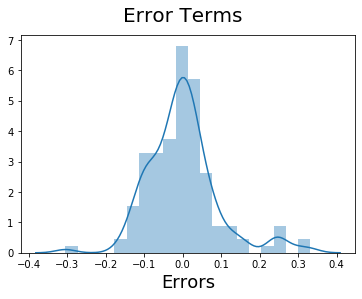

In [131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### 7) Making Predictions Using The Fitted Model:

In [132]:
# Applying scaler to all the given variables for test:
var = ['wheelbase', 'carlength', 'carwidth', 'carheight','curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
          'peakrpm', 'price', 'total_mpg']

df_test[var] = scaler.transform(df_test[var])


In [133]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and y_test:

In [134]:
y_test = df_test.pop('price')
X_test = df_test

In [136]:
X.columns

Index(['carwidth', 'bmw', 'peugeot', 'rear'], dtype='object')

In [137]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by taking required variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [143]:
X_test_new.head()

,const,carwidth,bmw,peugeot,rear
160,1.0,0.341667,0,0,0
186,1.0,0.433333,0,0,0
59,1.0,0.516667,0,0,0
165,1.0,0.308333,0,0,0
140,1.0,0.291667,0,0,0


In [141]:
# Making predictions
y_pred = lr_11.predict(X_test_new)

In [142]:
# calculate the R-squared score on the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7965906231498368

Thus, the R-squared score for the test set is approximately 80% and that of the train set is around 82%. 

#### 8) Model Evaluation:

Text(0, 0.5, 'y_pred')

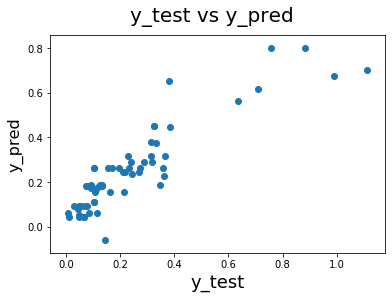

In [150]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Thus, we can say that the equation of our best fitted line is:
<br>
price= 0.9589 x carwidth +  0.3258 x bmw - 0.1237 x  peugeot +    0.6578 x rear   


So it can be concluded that the price of an automobile in the US market increases with the increase in carwidth, bmw, and rear and with a decrease in peugeot company price.